In [42]:
#abrindo as bibliotecas
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st 

## <span style="color: red;">Processamento dos dados:</span>

In [43]:
#lendo o arquivo
data = pd.read_csv("datasets/logs_exp_us.csv", sep='\t', dtype={'EventName':'category', 'ExpId':'category'})

In [44]:
#gerando nomes snake_case para as colunas do df
col = ['event', 'user', 'timestamp', 'group']
data.columns = col

In [45]:
#convertendo timestamp para o formato correto
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['date'] = data['timestamp'].dt.date
data['date'] = pd.to_datetime(data['date'])

In [46]:
df_size1=data.shape[0]
df_size1

244126

In [47]:
data

,event,user,timestamp,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      244126 non-null  category      
 1   user       244126 non-null  int64         
 2   timestamp  244126 non-null  datetime64[ns]
 3   group      244126 non-null  category      
 4   date       244126 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int64(1)
memory usage: 6.1 MB


Não há valores nulos.

In [49]:
data.duplicated().sum()

413

In [50]:
data=data.drop_duplicates()

In [51]:
n_user_total = pd.Series(data['user'].unique()).count()
n_user_total

7551

## <span style="color: red;">Análise exploratória de dados:</span>

In [52]:
#quantos eventos existem nos registros?
n_events = data['event'].value_counts().sum()
print("A amostra contém {} eventos".format(n_events))

A amostra contém 243713 eventos


In [53]:
#quantos usuarios existem nos registros?
n_users = data['user'].value_counts().count()
print("A amostra contém {} usuários".format(n_users))

A amostra contém 7551 usuários


In [54]:
print("Portanto o número médio de eventos por usuário é de {:.2f}".format(n_events/n_users))

Portanto o número médio de eventos por usuário é de 32.28


In [55]:
print("Os dados variam desde {} até {}".format(data['timestamp'].min(),data['timestamp'].max()))

Os dados variam desde 2019-07-25 04:43:36 até 2019-08-07 21:15:17


In [56]:
plt.style.use('seaborn-v0_8-dark')

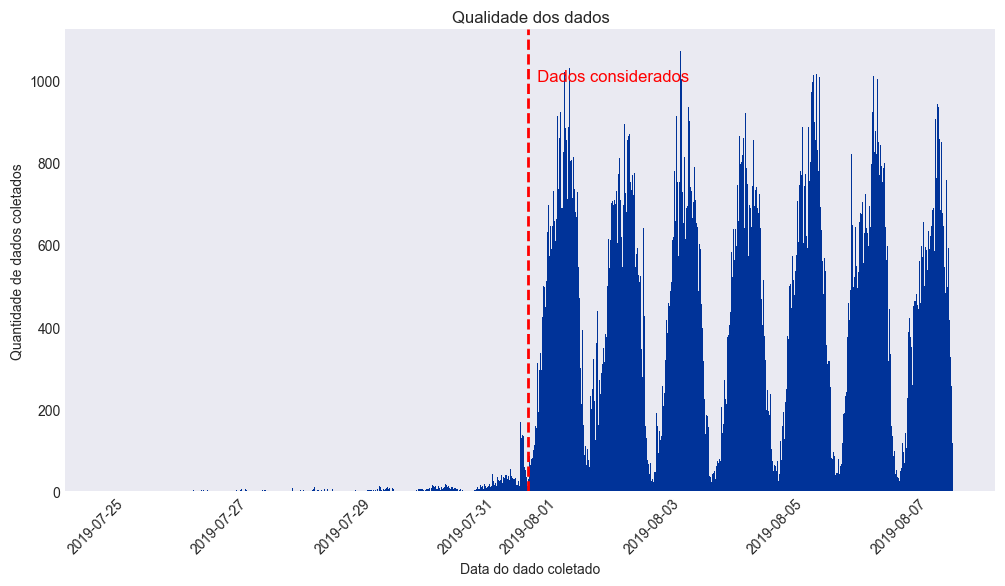

In [57]:
#definindo o estilo do grafico
plt.style.use('seaborn-v0_8-dark')

#fig é a figura e ax são os eixos. Definindo tamanho do gráfico.
fig,ax = plt.subplots(figsize=(12,6))

#plotagem
fig = data['timestamp'].hist(bins=1000, color='#003399')

#rotacionando o eixo x
ax.tick_params(axis='x', rotation=45)

#adicionando titulo e rótulos
ax.set_title('Qualidade dos dados')
ax.set_xlabel("Data do dado coletado")
ax.set_ylabel("Quantidade de dados coletados")

#retirando o gride
ax.grid(False)

line_date = pd.Timestamp('2019-08-01')
ax.axvline(x=line_date, color='red', linestyle='--', linewidth=2)

ax.annotate(
    '  Dados considerados', 
    xy=(line_date, 0.5),  # Coordenadas no gráfico onde a seta deve apontar
    xytext=(line_date, 1000),  # Coordenadas no gráfico onde o texto da anotação deve aparecer
    fontsize=12,
    color='red'
)

#apresentando o gráfico
plt.show()


Os dados antes do dia primeiro de Agosto serão ignorados.

In [58]:
df = data[data['timestamp']>=line_date].reset_index(drop=True)
df_size2 = df.shape[0]

In [59]:
print(data['group'].value_counts())

group
248    85582
246    80181
247    77950
Name: count, dtype: int64


Portanto a representatividade dos grupos está garantida

In [60]:
print("Foram perdidas {} linhas na filtragem dos dados, o que não é representativo, \njá que se trata de apenas {:.2f}% dos dados".format(df_size1-df_size2,(df_size1-df_size2)/df_size1*100))

Foram perdidas 3239 linhas na filtragem dos dados, o que não é representativo, 
já que se trata de apenas 1.33% dos dados


## <span style="color: red;">Funil de vendas:</span>

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240887 entries, 0 to 240886
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      240887 non-null  category      
 1   user       240887 non-null  int64         
 2   timestamp  240887 non-null  datetime64[ns]
 3   group      240887 non-null  category      
 4   date       240887 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int64(1)
memory usage: 6.0 MB


Essa é a lista de eventos seguido de sua contagem de ocorrência em ordem descendente

In [62]:
#contagem de eventos em ordem descendente
n_events = df['event'].value_counts(ascending=False)
print(n_events)

event
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: count, dtype: int64


A contagem de usuarios unicos que passaram por todos os eventos

In [63]:
#lista de todos os usuários
user_list = pd.Series(df['user'].unique())

#lista de usuários que participaram de todos os eventos que serão filtrados
user_all_events = user_list

#lista de eventos
events = pd.Series(df['event'].unique())

#criando um df com os usuarios unicos de cada evento
event_list = pd.DataFrame()

#df com o numero de usuarios unicos em cada evento
funnel = pd.Series()

#filtrando os dados
for event in events:

    #quem são os usuarios de cada evento?
    filter = df[df['event'] == event]['user'].unique()

    #filtrando os usuários que passaram por todos os eventos
    user_all_events = user_all_events[user_all_events.isin(filter)]

    #df apresentando qual usuario fez parte de qual evento
    event_list[event] = pd.Series(filter)

    #df com a quantidade de usuarios por evento
    funnel[event] = pd.Series(filter).count()

#contagem dos usuarios unicos que passaram por todos os eventos
user_all_events.count()

466

In [64]:
funnel = funnel.sort_values(ascending=False)
n_user_df = pd.Series(df['user'].unique()).count()

funnel

MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
dtype: int64

In [65]:
for idx, value in funnel.items():
    print('O evento {}, têm uma proporção de usuários que executaram a ação pelo menos uma vez de {:.2f}%\n'.format(idx, value/n_user_df*100))

O evento MainScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 98.47%

O evento OffersScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 60.96%

O evento CartScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 49.56%

O evento PaymentScreenSuccessful, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 46.97%

O evento Tutorial, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 11.15%



Na tentativa de entender porque nao houve um evento que todos os usuarios participaram vamos filtrar os dados usando MainScreenAppear como referencia de que todos os usuarios teoricamente teriam que participar.

In [66]:
#criar uma lista de usuarios regulares,ou seja, todos os usuarios que participaram de MainScreenAppear
regular_users = pd.Series(df[df['event']=='MainScreenAppear']['user'].unique())

#lista de todos os usuarios
all_users = pd.Series(df['user'].unique())

#filtrar da lista de todos os usuarios a lista de usuarios regulares: lista de usuarios anômalos
abnormal = all_users[~(all_users.isin(regular_users))].reset_index(drop=True)


In [67]:
df_filtered = df[~(df['user'].isin(abnormal))]

#lista de todos os usuários filtrados
user_list_filtered = pd.Series(df_filtered['user'].unique())

#lista de usuários que participaram de todos os eventos que serão filtrados
user_all_events = user_list_filtered

#lista de eventos filtrados
events_filtered = pd.Series(df_filtered['event'].unique())

#criando um df com os usuarios unicos de cada evento
event_list = pd.DataFrame()

#df com o numero de usuarios unicos em cada evento
funnel = pd.Series()

#filtrando os dados
for event in events_filtered:

    #usuários de cada evento
    filter = df_filtered[df_filtered['event'] == event]['user'].unique()

    #filtrando os usuários que passaram por todos os eventos
    user_all_events = user_all_events[user_all_events.isin(filter)]

    #df apresentando qual usuario fez parte de qual evento
    event_list[event] = pd.Series(filter)

    #df com a quantidade de usuarios por evento
    funnel[event] = pd.Series(filter).count()

#contagem dos usuarios unicos que passaram por todos os eventos filtrados
print("A quantidade de usuarios que passaram por todos os eventos é de: {:.2f}%\n".format(user_all_events.count()/n_user_df*100))

#ordenando os eventos do funil de vendas
funnel = funnel.sort_values(ascending=False)

#contando a quantidade de usuários exceto os eventos de tutorial
n_user_df = pd.Series(df_filtered['user'].unique()).count()

#testando se a hipótese do funil de vendas se concretizou
for idx, value in funnel.items():
    print('O evento {}, têm uma proporção de usuários que executaram a ação pelo menos uma vez de {:.2f}%\n'.format(idx, value/n_user_df*100))

A quantidade de usuarios que passaram por todos os eventos é de: 6.19%

O evento MainScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 100.00%

O evento OffersScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 60.41%

O evento CartScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 49.00%

O evento PaymentScreenSuccessful, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 46.38%

O evento Tutorial, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 11.27%



Provavelmente os 1,5% de usuarios que foram filtrados entraram na rede antes da meia noite do dia 01 de agosto, que filtramos no inicio da analise. Como nao são uma parcela significativa iremos apenas ignorar os seus dados, sem aprofundar a analise.

Como a proporção de usuarios que participaram de todos os eventos nao é igual ao evento Tutorial, podemos inferir que nem todos os eventos são sequenciais. Portanto testaremos a hipótese de que o evento Tutorial nao faz parte do funil de vendas.
Portanto filtraremos o tutorial e criaremos um df para o funil de vendas. Se chamará Sales.

In [68]:
#filtrando os eventos Tutorial
sales = df_filtered[~(df_filtered['event']=='Tutorial')]

#lista de todos os usuários filtrados
user_list_filtered = pd.Series(sales['user'].unique())

#lista de usuários que participaram de todos os eventos que serão filtrados
user_all_events = user_list_filtered

#lista de eventos filtrados
events_filtered = pd.Series(sales['event'].unique())

#criando um df com os usuarios unicos de cada evento
event_list = pd.DataFrame()

#df com o numero de usuarios unicos em cada evento
funnel = pd.Series()

#filtrando os dados
for event in events_filtered:

    #usuários de cada evento
    filter = sales[sales['event'] == event]['user'].unique()

    #filtrando os usuários que passaram por todos os eventos
    user_all_events = user_all_events[user_all_events.isin(filter)]

    #df apresentando qual usuario fez parte de qual evento
    event_list[event] = pd.Series(filter)

    #df com a quantidade de usuarios por evento
    funnel[event] = pd.Series(filter).count()

#contagem dos usuarios unicos que passaram por todos os eventos filtrados
print("A quantidade de usuarios que passaram por todos os eventos exceto o tutorial é de: {:.2f}%\n".format(user_all_events.count()/n_user_df*100))

#ordenando os eventos do funil de vendas
funnel = funnel.sort_values(ascending=False)

#contando a quantidade de usuários exceto os eventos de tutorial
n_user_df = pd.Series(sales['user'].unique()).count()

#testando se a hipótese do funil de vendas se concretizou
for idx, value in funnel.items():
    print('O evento {}, têm uma proporção de usuários que executaram a ação pelo menos uma vez de {:.2f}%\n'.format(idx, value/n_user_df*100))

A quantidade de usuarios que passaram por todos os eventos exceto o tutorial é de: 46.22%

O evento MainScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 100.00%

O evento OffersScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 60.41%

O evento CartScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 49.00%

O evento PaymentScreenSuccessful, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 46.38%



Reduzimos drasticamente a diferença entre:
- usuarios que passaram por todos os eventos,
- usuarios que passaram pelo ultimo evento.

Como a diferença é pouca podemos tentar analisar caso a caso

In [69]:
#lista dos usuarios que aparecem como que executaram 'PaymentScreenSuccesful' mas nao fizeram todos os eventos 
last_abnormal = event_list[~(event_list['PaymentScreenSuccessful'].isin(user_all_events))]['PaymentScreenSuccessful'].dropna().reset_index(drop=True)

#df com todos os eventos desses usuarios
df_last_abnormal = sales[sales['user'].isin(last_abnormal)]

#observando o comportamento de cada usuario um por um
df_last_abnormal[df_last_abnormal['user']==last_abnormal[4]]

,event,user,timestamp,group,date
15597,MainScreenAppear,3626993001520930273,2019-08-01 12:17:31,247,2019-08-01
15598,PaymentScreenSuccessful,3626993001520930273,2019-08-01 12:17:33,247,2019-08-01
15600,OffersScreenAppear,3626993001520930273,2019-08-01 12:17:38,247,2019-08-01
15608,OffersScreenAppear,3626993001520930273,2019-08-01 12:17:52,247,2019-08-01
15612,OffersScreenAppear,3626993001520930273,2019-08-01 12:17:56,247,2019-08-01
16361,OffersScreenAppear,3626993001520930273,2019-08-01 12:32:40,247,2019-08-01
153331,MainScreenAppear,3626993001520930273,2019-08-05 12:13:36,247,2019-08-05
153337,MainScreenAppear,3626993001520930273,2019-08-05 12:13:46,247,2019-08-05
153341,OffersScreenAppear,3626993001520930273,2019-08-05 12:13:52,247,2019-08-05
153364,OffersScreenAppear,3626993001520930273,2019-08-05 12:14:40,247,2019-08-05


In [70]:
last_abnormal

0     1.807104e+18
1     2.842451e+18
2     8.610309e+18
3     2.546486e+18
4     3.626993e+18
5     1.568403e+18
6     4.880889e+18
7     5.624422e+18
8     4.518330e+18
9     1.872851e+18
10    6.515930e+18
11    2.172088e+17
Name: PaymentScreenSuccessful, dtype: float64

Observando o comportamento caso a caso não foi possível perceber um comportamento que justifique porque os usuarios pulam etapas do filtro, nao sao do mesmo grupo e também nao são do mesmo dia.

Como não podemos entender coisas em comum com esses doze usuários vamos supor que seja um problema técnico e ignora-los tambem, já que nao tem representacao do total do df, por serem apenas cerca de 200 eventos de 12 usuarios diferentes num conjunto de 240.000 eventos

In [71]:
sales = sales[~(sales['user'].isin(last_abnormal))]

In [72]:
print(sales['group'].value_counts())

group
248    83186
246    78131
247    75756
Name: count, dtype: int64


conferimos acima se temos muitos usuarios de todos os grupos.

In [73]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237073 entries, 1 to 240886
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      237073 non-null  category      
 1   user       237073 non-null  int64         
 2   timestamp  237073 non-null  datetime64[ns]
 3   group      237073 non-null  category      
 4   date       237073 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int64(1)
memory usage: 7.7 MB


In [74]:
#lista de todos os usuários filtrados
user_list_filtered = pd.Series(sales['user'].unique())

#lista de usuários que participaram de todos os eventos que serão filtrados
user_all_events = user_list_filtered

#lista de eventos filtrados
events_filtered = pd.Series(sales['event'].unique())

#criando um df com os usuarios unicos de cada evento
event_list = pd.DataFrame()

#df com o numero de usuarios unicos em cada evento
funnel = pd.Series()

#filtrando os dados
for event in events_filtered:

    #usuários de cada evento
    filter = sales[sales['event'] == event]['user'].unique()

    #filtrando os usuários que passaram por todos os eventos
    user_all_events = user_all_events[user_all_events.isin(filter)]

    #df apresentando qual usuario fez parte de qual evento
    event_list[event] = pd.Series(filter)

    #df com a quantidade de usuarios por evento
    funnel[event] = pd.Series(filter).count()

#contagem dos usuarios unicos que passaram por todos os eventos filtrados
print("A quantidade de usuarios que passaram por todos os eventos exceto o tutorial é de: {:.2f}%\n".format(user_all_events.count()/n_user_df*100))

#ordenando os eventos do funil de vendas
funnel = funnel.sort_values(ascending=False)

#contando a quantidade de usuários exceto os eventos de tutorial
n_user_df = pd.Series(sales['user'].unique()).count()

#testando se a hipótese do funil de vendas se concretizou
for idx, value in funnel.items():
    print('O evento {}, têm uma proporção de usuários que executaram a ação pelo menos uma vez de {:.2f}%\n'.format(idx, value/n_user_df*100))

A quantidade de usuarios que passaram por todos os eventos exceto o tutorial é de: 46.22%

O evento MainScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 100.00%

O evento OffersScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 60.44%

O evento CartScreenAppear, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 48.98%

O evento PaymentScreenSuccessful, têm uma proporção de usuários que executaram a ação pelo menos uma vez de 46.29%



Ainda existem usuarios que conseguem chegar na tela de pagamento concluido sem passar por todas as etapas, mas eles são insignificantes dentro do df, entao iremos continuar.

Falta apenas a analise da conversão relativa ao evento anterior.


In [75]:
#calculando a conversão relativa de cada evento em relacao ao anterior

#o primeiro evento calcula a conversão com relacao a ele mesmo ou seja 100%.
last_event_user = n_user_df

#iterando sobre cada evento para calcular a conversão relativa
for idx, value in funnel.items():
    #printando a conversão
    print('O evento {}, têm uma taxa de conversão em relação ao evento anterior de {:.2f}%\n'.format(idx, value/last_event_user*100))
    last_event_user = value

O evento MainScreenAppear, têm uma taxa de conversão em relação ao evento anterior de 100.00%

O evento OffersScreenAppear, têm uma taxa de conversão em relação ao evento anterior de 60.44%

O evento CartScreenAppear, têm uma taxa de conversão em relação ao evento anterior de 81.04%

O evento PaymentScreenSuccessful, têm uma taxa de conversão em relação ao evento anterior de 94.51%



Perdemos mais usuarios na conversão de MainScreenAppear para OffersScreenAppear. Talvez estejamos tendo uma dificuldade em apresentar aos usuários as ofertas.

## <span style="color: red;">Resultados:</span>

In [76]:
print(sales.groupby(by='group', observed=True)['user'].nunique())

group
246    2446
247    2473
248    2488
Name: user, dtype: int64


Acima esta contado a listado a quantidade de usuarios unicos para cada grupo analisado.
Podemos prosseguir com o experimento já que temos quantidades proximas de usuarios

Agora será analisado a diferença entre os grupos.

A hipótese nula é sempre que os grupos são iguais.
Caso a hipotese nula nao se confirme a hipotese alternativa se torna verdadeira. Os grupos são diferentes.

In [77]:
#função de comparacao de conversao, relativo a evento e grupo
def t_test(df, group1, group2, event):

    #criando a tabela de todos os usuarios e seus grupos
    conversions = df[['user', 'group']].drop_duplicates()

    #criando o vetor que será comparado, dos convertidos
    #caso o usuario tenha participado do evento ele tera valor 1
    converted = pd.DataFrame(data={'user':df[df['event']==event]['user'].unique(), 'converted':1})

    #caso nao tenha participado do evento ele tera valor 0
    conversions = conversions.merge(converted, on='user', how='left')
    conversions['converted'] = conversions['converted'].fillna(0)

    #fazendo as comparações
    statistic, pvalue = st.ttest_ind(
        conversions[conversions['group'] == group1]["converted"],
        conversions[conversions['group'] == group2]["converted"]
    )

    return statistic, pvalue


In [78]:
t_test(sales,'247','248', 'PaymentScreenSuccessful')

(-0.17548932079554133, 0.8607023262587784)

In [79]:
#função para avaliar cada um dos eventos do df
def events_ttest(df, group1, group2):
    events = pd.Series(sales['event'].unique())
    
    for event in events:
        if event=='MainScreenAppear':
            print("Para o evento MainScreenAppear não foi encontrado variação, as populações são exatamente iguais\n")
        else:
            statistic, pvalue = t_test(df, group1, group2, event)
            print('Para o evento {} encontamos uma variação entre o grupo {} e o grupo {} de {:.2f}%\n'.format(event, group1, group2, statistic))
            print('O valor P é de {:.2f}, portanto\n'.format(pvalue))

            if pvalue < 0.05:
                print('Hipótese nula rejeitada. Os grupos são significativamente diferentes\n\n')
            else:
                print('Hipótese nula confirmada. Os grupos são significativamente iguais\n\n')




In [80]:
events_ttest(sales,'246','247')

Para o evento MainScreenAppear não foi encontrado variação, as populações são exatamente iguais

Para o evento OffersScreenAppear encontamos uma variação entre o grupo 246 e o grupo 247 de 1.18%

O valor P é de 0.24, portanto

Os grupos são significativamente iguais


Para o evento CartScreenAppear encontamos uma variação entre o grupo 246 e o grupo 247 de 1.21%

O valor P é de 0.23, portanto

Os grupos são significativamente iguais


Para o evento PaymentScreenSuccessful encontamos uma variação entre o grupo 246 e o grupo 247 de 1.53%

O valor P é de 0.13, portanto

Os grupos são significativamente iguais




In [81]:
events_ttest(sales,'246','248')

Para o evento MainScreenAppear não foi encontrado variação, as populações são exatamente iguais

Para o evento OffersScreenAppear encontamos uma variação entre o grupo 246 e o grupo 248 de 1.33%

O valor P é de 0.18, portanto

Os grupos são significativamente iguais


Para o evento CartScreenAppear encontamos uma variação entre o grupo 246 e o grupo 248 de 1.87%

O valor P é de 0.06, portanto

Os grupos são significativamente iguais


Para o evento PaymentScreenSuccessful encontamos uma variação entre o grupo 246 e o grupo 248 de 1.36%

O valor P é de 0.17, portanto

Os grupos são significativamente iguais




In [82]:
events_ttest(sales,'247','248')

Para o evento MainScreenAppear não foi encontrado variação, as populações são exatamente iguais

Para o evento OffersScreenAppear encontamos uma variação entre o grupo 247 e o grupo 248 de 0.14%

O valor P é de 0.89, portanto

Os grupos são significativamente iguais


Para o evento CartScreenAppear encontamos uma variação entre o grupo 247 e o grupo 248 de 0.66%

O valor P é de 0.51, portanto

Os grupos são significativamente iguais


Para o evento PaymentScreenSuccessful encontamos uma variação entre o grupo 247 e o grupo 248 de -0.18%

O valor P é de 0.86, portanto

Os grupos são significativamente iguais




O nível de significancia estatística[alpha] usado foi de 0.05.